<a href="https://colab.research.google.com/github/ghost22r/challenge-amigo-secreto-aluram/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [2]:
ingreso_total_tienda1 = tienda['Precio'].sum()
ingreso_total_tienda2 = tienda2['Precio'].sum()
ingreso_total_tienda3 = tienda3['Precio'].sum()
ingreso_total_tienda4 = tienda4['Precio'].sum()

In [3]:
factura_tiendas = {'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], \
                   'Ingreso Total': [f'{ingreso_total_tienda1:,.2f}',f'{ingreso_total_tienda2:,.2f}', \
                                     f'{ingreso_total_tienda3:,.2f}', f'{ingreso_total_tienda4:,.2f}']}

In [4]:
facturacion_tiendas = pd.DataFrame(factura_tiendas)
facturacion_tiendas

,Tienda,Ingreso Total
0,Tienda 1,"1,150,880,400.00"
1,Tienda 2,"1,116,343,500.00"
2,Tienda 3,"1,098,019,600.00"
3,Tienda 4,"1,038,375,700.00"


###Grafica de facturación de todas las tiendas

<Figure size 800x400 with 0 Axes>

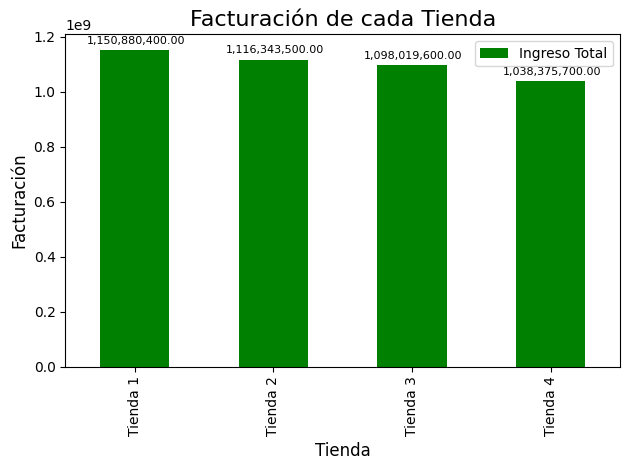

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

facturacion_tiendas['Ingreso Total'] = facturacion_tiendas['Ingreso Total'].str.replace(',', '').astype(float)

ax = facturacion_tiendas.plot(kind='bar', x='Tienda', y='Ingreso Total', color='green', legend=True)

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), \
                ha='center', va='bottom',xytext=(1, 3), textcoords='offset points', fontsize=8)

plt.title('Facturación de cada Tienda', fontsize=16)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Facturación', fontsize=12)
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

####Tienda 1: categoria de productos

In [6]:
categoria_tienda1 = tienda['Categoría del Producto'].value_counts()
categoria_tienda1

,count
Categoría del Producto,
Muebles,465
Electrónicos,448
Juguetes,324
Electrodomésticos,312
Deportes y diversión,284
Instrumentos musicales,182
Libros,173
Artículos para el hogar,171


In [7]:
categoria_mas_vendida_tienda1 = categoria_tienda1.idxmax()
cantidad_mas_vendida_tienda1 = categoria_tienda1.max()
print(f'La categoría más vendida en la tienda 1 es: {categoria_mas_vendida_tienda1} con {cantidad_mas_vendida_tienda1} unidades')

La categoría más vendida en la tienda 1 es: Muebles con 465 unidades


####Tienda 2: Categorias de productos

In [8]:
categoria_tienda2 = tienda2['Categoría del Producto'].value_counts()
categoria_tienda2

,count
Categoría del Producto,
Muebles,442
Electrónicos,422
Juguetes,313
Electrodomésticos,305
Deportes y diversión,275
Instrumentos musicales,224
Libros,197
Artículos para el hogar,181


In [9]:
categoria_mas_vendida_tienda2 = categoria_tienda2.idxmax()
cantidad_mas_vendida_tienda2 = categoria_tienda2.max()
print(f'La categoría más vendida en la tienda 2 es: {categoria_mas_vendida_tienda2} con {cantidad_mas_vendida_tienda2} unidades')

La categoría más vendida en la tienda 2 es: Muebles con 442 unidades


####Tienda 3: categoria de productos

In [10]:
categoria_tienda3 = tienda3['Categoría del Producto'].value_counts()
categoria_tienda3

,count
Categoría del Producto,
Muebles,499
Electrónicos,451
Juguetes,315
Electrodomésticos,278
Deportes y diversión,277
Libros,185
Instrumentos musicales,177
Artículos para el hogar,177


In [11]:
categoria_mas_vendida_tienda3 = categoria_tienda3.idxmax()
cantidad_mas_vendida_tienda3 = categoria_tienda3.max()
print(f'La categoría más vendida en la tienda 3 es: {categoria_mas_vendida_tienda3} con {cantidad_mas_vendida_tienda3} unidades')

La categoría más vendida en la tienda 3 es: Muebles con 499 unidades


####Tienda 4; categorias de productos

In [12]:
categoria_tienda4 = tienda4['Categoría del Producto'].value_counts()
categoria_tienda4

,count
Categoría del Producto,
Muebles,480
Electrónicos,451
Juguetes,338
Deportes y diversión,277
Electrodomésticos,254
Artículos para el hogar,201
Libros,187
Instrumentos musicales,170


In [13]:
categoria_mas_vendida_tienda4 = categoria_tienda4.idxmax()
cantidad_mas_vendida_tienda4 = categoria_tienda4.max()
print(f'La categoría más vendida en la tienda 4 es: {categoria_mas_vendida_tienda4} con {cantidad_mas_vendida_tienda4} unidades')

La categoría más vendida en la tienda 4 es: Muebles con 480 unidades


# 3. Calificación promedio de la tienda


In [14]:
calif_promedio_tienda1 = tienda['Calificación'].mean()
calif_promedio_tienda2 = tienda2['Calificación'].mean()
calif_promedio_tienda3 = tienda3['Calificación'].mean()
calif_promedio_tienda4 = tienda4['Calificación'].mean()

In [15]:
calificacion_promedio_tiendas = {'Tienda': ['Tienda 1','Tienda 2','Tienda 3','Tienda 4'], \
                        'Calificación promedio': [f'{calif_promedio_tienda1:.2f}', f'{calif_promedio_tienda2:.2f}',\
                                                  f'{calif_promedio_tienda3:.2f}', f'{calif_promedio_tienda4:.2f}']}

In [16]:
calificacion_tiendas = pd.DataFrame(calificacion_promedio_tiendas)
calificacion_tiendas

,Tienda,Calificación promedio
0,Tienda 1,3.98
1,Tienda 2,4.04
2,Tienda 3,4.05
3,Tienda 4,4.00


##Grafica de calificación promedio de cada tienda

<Axes: xlabel='Tienda', ylabel='Calificación promedio'>

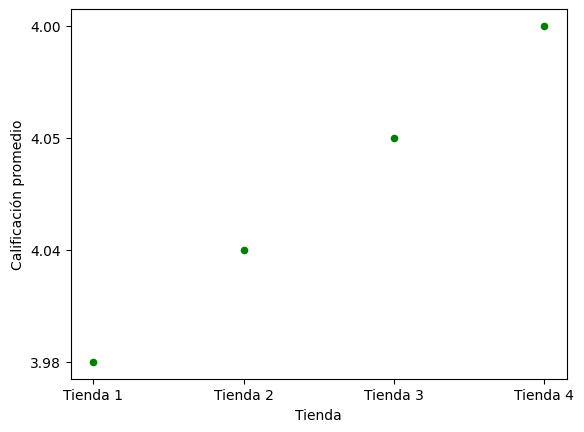

In [17]:
calificacion_tiendas.plot(kind='scatter', color='green',x='Tienda',y='Calificación promedio')

# 4. Productos más y menos vendidos

###Cantidades más vendida de la tienda **1**

In [18]:
prod_mas_vendido_tienda1 = tienda.groupby('Producto').size().sort_values(ascending=False).head().reset_index(name='Cantidad Vendida')
prod_mas_vendido_tienda1

,Producto,Cantidad Vendida
0,Armario,60
1,TV LED UHD 4K,60
2,Microondas,60
3,Secadora de ropa,58
4,Mesa de noche,56


####Cantidades menos vendida

In [19]:
prod_menos_vendido_tienda1 = tienda.groupby('Producto').size().sort_values(ascending=True).head().reset_index(name='Cant. menos Vendida')
prod_menos_vendido_tienda1

,Producto,Cant. menos Vendida
0,Auriculares con micrófono,33
1,Celular ABXY,33
2,Olla de presión,35
3,Pandereta,36
4,Ciencia de datos con Python,39


###Cantidades más vendida de la tienda **2**

In [20]:
prod_mas_vendido_tienda2 = tienda2.groupby('Producto').size().sort_values(ascending=False).head().reset_index(name='Cantidad Vendida')
prod_mas_vendido_tienda2

,Producto,Cantidad Vendida
0,Iniciando en programación,65
1,Microondas,62
2,Batería,61
3,Pandereta,58
4,Guitarra acústica,58


####Cantidades menos vendida

In [21]:
prod_menos_vendido_tienda1 = tienda2.groupby('Producto').size().sort_values(ascending=True).head().reset_index(name='Cant. menos Vendida')
prod_menos_vendido_tienda1

,Producto,Cant. menos Vendida
0,Juego de mesa,32
1,Impresora,34
2,Mesa de comedor,34
3,Sillón,35
4,Auriculares,37


###Cantidades más vendida de la tienda **3**

In [22]:
prod_mas_vendido_tienda3 = tienda3.groupby('Producto').size().sort_values(ascending=False).head().reset_index(name='Cantidad Vendida')
prod_mas_vendido_tienda3

,Producto,Cantidad Vendida
0,Kit de bancas,57
1,Mesa de comedor,56
2,Cama king,56
3,Set de ollas,55
4,Mesa de noche,55


####Cantidades menos vendida

In [23]:
prod_menos_vendido_tienda3 = tienda3.groupby('Producto').size().sort_values(ascending=True).head().reset_index(name='Cant. menos Vendida')
prod_menos_vendido_tienda3

,Producto,Cant. menos Vendida
0,Bloques de construcción,35
1,Set de vasos,36
2,Mochila,36
3,Microondas,36
4,Vaso térmico,38


###Cantidades más vendida de la tienda **4**

In [24]:
prod_mas_vendido_tienda4 = tienda4.groupby('Producto').size().sort_values(ascending=False).head().reset_index(name='Cantidad Vendida')
prod_mas_vendido_tienda4

,Producto,Cantidad Vendida
0,Cama box,62
1,Cubertería,59
2,Cama king,56
3,Dashboards con Power BI,56
4,Carrito de control remoto,55


####Cantidades menos vendida de la tienda **4**

In [25]:
prod_menos_vendido_tienda4 = tienda4.groupby('Producto').size().sort_values(ascending=True).head().reset_index(name='Cant. menos Vendida')
prod_menos_vendido_tienda4

,Producto,Cant. menos Vendida
0,Guitarra eléctrica,33
1,Armario,34
2,Guitarra acústica,37
3,Ciencia de datos con Python,38
4,Lavadora de ropa,38


# 5. Envío promedio por tienda

In [26]:
costo_envio_tienda1 = tienda['Costo de envío'].mean()
costo_envio_tienda2 = tienda2['Costo de envío'].mean()
costo_envio_tienda3 = tienda3['Costo de envío'].mean()
costo_envio_tienda4 = tienda4['Costo de envío'].mean()

In [27]:
tiendas_envios = {'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], \
                  'Costo de envio': [f'{costo_envio_tienda1:,.2f}', f'{costo_envio_tienda2:,.2f}', \
                                     f'{costo_envio_tienda3:,.2f}', f'{costo_envio_tienda4:,.2f}']}


In [28]:
costo_envio_tiendas = pd.DataFrame(tiendas_envios)
costo_envio_tiendas

,Tienda,Costo de envio
0,Tienda 1,"26,018.61"
1,Tienda 2,"25,216.24"
2,Tienda 3,"24,805.68"
3,Tienda 4,"23,459.46"


##Gasto promedio de cada tienda grafica

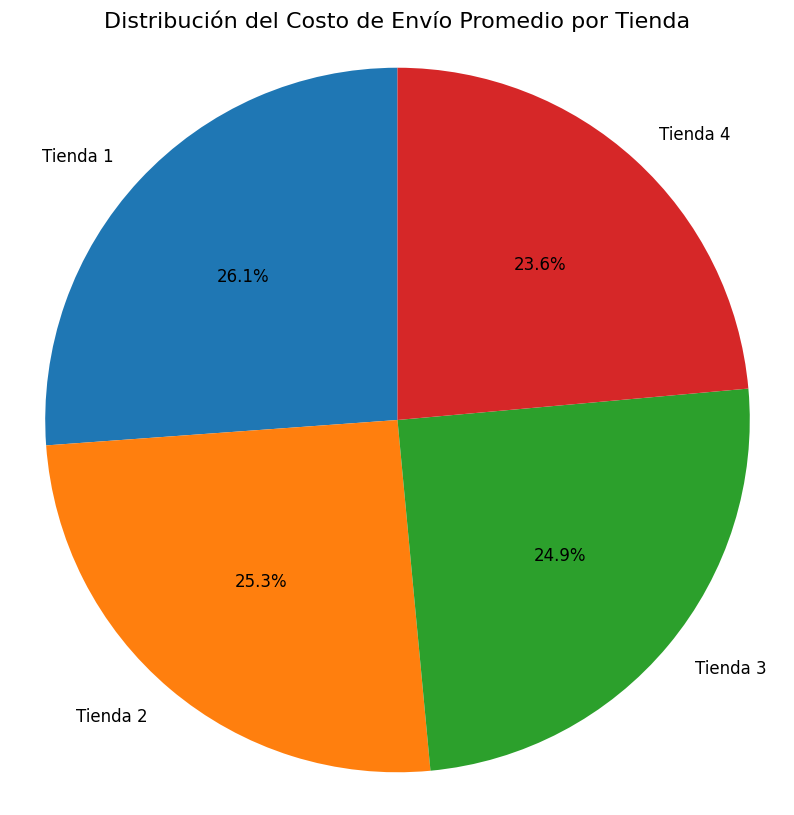

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

costo_envio_tiendas['Costo de envio'] = costo_envio_tiendas['Costo de envio'].str.replace(',', '').astype(float)

plt.pie(costo_envio_tiendas['Costo de envio'], labels=costo_envio_tiendas['Tienda'], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
plt.title('Distribución del Costo de Envío Promedio por Tienda', fontsize=16)
plt.axis('equal')
plt.show()



---



#**Informe** de Decisión Estratégica: ¿Qué tienda debemos vender?

##1. El Objetivo

Analizamos los datos de las cuatro sucursales para identificar cuál de ellas tiene el rendimiento más bajo. La meta es clara: recomendar al Sr. Juan qué tienda debería vender (traspasar) para optimizar su capital, basándonos en quién genera menos ingresos y tiene menor impacto en el mercado.

##2. Lo que nos dicen los números

Al revisar el desempeño de cada tienda, encontramos lo siguiente:

###**A**. ¿Quién genera menos dinero? (Ingresos Totales)

* El problema: La Tienda 4 es la que reporta los ingresos más bajos ($1,038,375,700).

* La comparación: Si la comparamos con la líder (Tienda 1), la Tienda 4 está facturando más de $112 millones menos. Es una diferencia considerable que impacta el bolsillo.

###**B**. Desempeño en Ventas (Categorías y Productos)

* Aunque todas las tiendas venden bien la categoría de Muebles, la Tienda 4 no es la líder en volumen (se queda con 480 unidades, debajo de la Tienda 3 que mueve 499).

* Sus productos "estrella" como la "Cama box" se venden bien, pero no lo suficiente para levantar la facturación total al nivel de las otras.

###**C**. Satisfacción y Costos

* Calificación: Su calificación de 4.00 es aceptable, pero no destaca. No tiene la excelencia de la Tienda 3 (4.05) ni el volumen de la Tienda 1. Es una tienda "promedio".

* Envíos: Aunque la Tienda 4 tiene el costo de envío más barato ($23,459), esto nos dice algo preocupante: tener envíos baratos no está atrayendo suficientes clientes para compensar la baja facturación.

##3. Conclusión: La recomendación

Considerando que el objetivo es quedarse con los negocios más rentables, mi recomendación para el Sr. Juan es vender la Tienda 4.

¿Por qué? Es simple: es la tienda que menos dinero ingresa. Aunque es eficiente en costos de envío, no tiene la fuerza de ventas de la Tienda 1 ni la fidelidad de clientes de la Tienda 3. Al deshacerse de la Tienda 4, el Sr. Juan elimina el activo de menor rendimiento y puede enfocar esos recursos en potenciar las tiendas que sí están liderando el mercado (como la 1 en ventas o la 3 en calidad).



---



In [30]:
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

all_stores_df = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)
print("Combined DataFrame created successfully. First 5 rows:")
print(all_stores_df.head())

Combined DataFrame created successfully. First 5 rows:
            Producto Categoría del Producto    Precio  Costo de envío  \
0  Asistente virtual           Electrónicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodomésticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificación  \
0      16/01/2021      Pedro Gomez          Bogotá             4   
1      18/05/2022  Beatriz Morales        Medellín             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medellín             5   

       Método de pago  Cantidad de cuotas       lat       lon    Tienda  
0  Tarjeta de crédito  

Unique stores found: ['Tienda 1' 'Tienda 2' 'Tienda 3' 'Tienda 4']
Assigned colors: ['red', 'blue', 'green', 'purple']
Assigned markers: ['o', 's', '^', 'D']


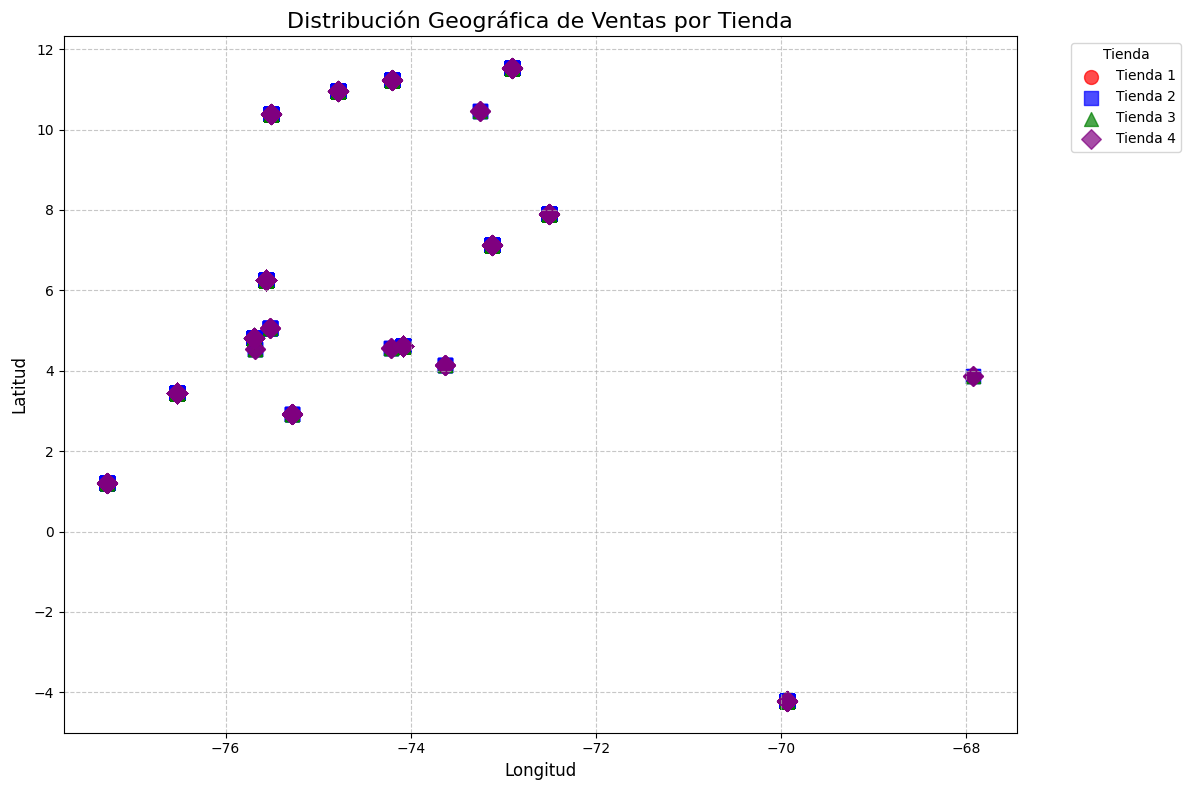

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

unique_stores = all_stores_df['Tienda'].unique()
colors = ['red', 'blue', 'green', 'purple']
markers = ['o', 's', '^', 'D'] # Circle, Square, Up-triangle, Diamond

print(f"Unique stores found: {unique_stores}")
print(f"Assigned colors: {colors}")
print(f"Assigned markers: {markers}")

for i, store in enumerate(unique_stores):
    store_data = all_stores_df[all_stores_df['Tienda'] == store]
    if not store_data.empty: # Ensure there is data to plot for the store
        plt.scatter(
            store_data['lon'],
            store_data['lat'],
            color=colors[i % len(colors)],
            marker=markers[i % len(markers)], # Use different markers
            label=store,
            alpha=0.7, # Slightly less transparent
            s=100 # Larger points
        )
    else:
        print(f"Warning: No data found for {store}")

plt.title('Distribución Geográfica de Ventas por Tienda', fontsize=16)
plt.xlabel('Longitud', fontsize=12)
plt.ylabel('Latitud', fontsize=12)
plt.legend(title='Tienda', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

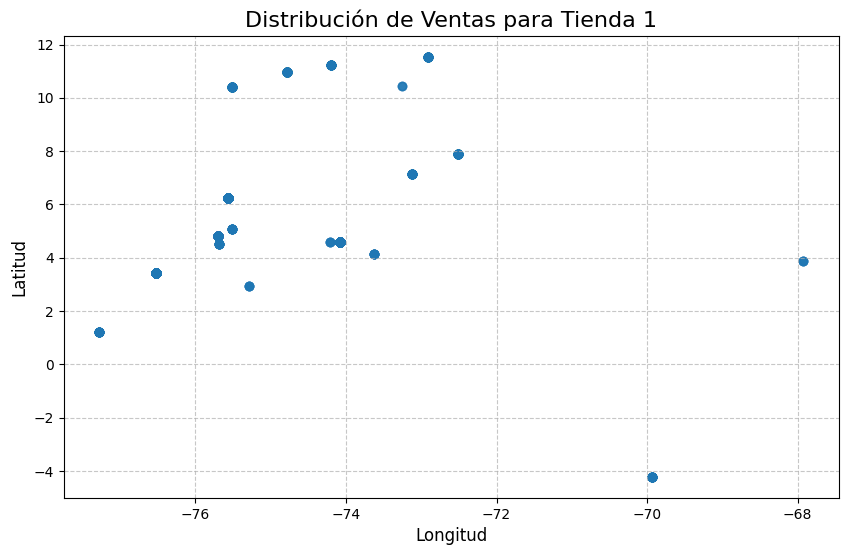

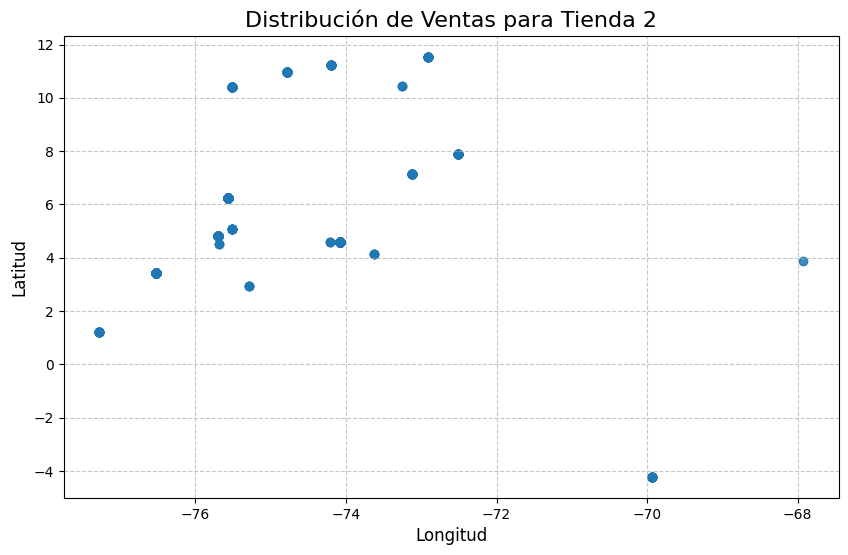

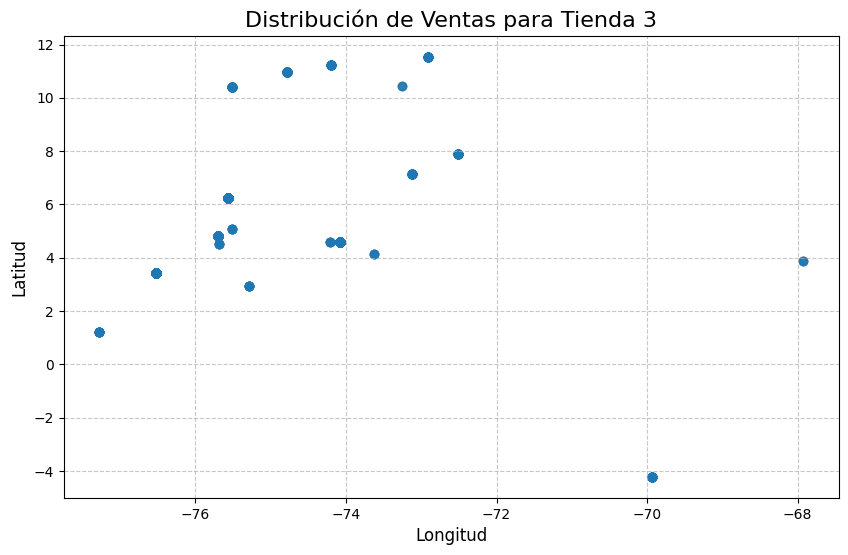

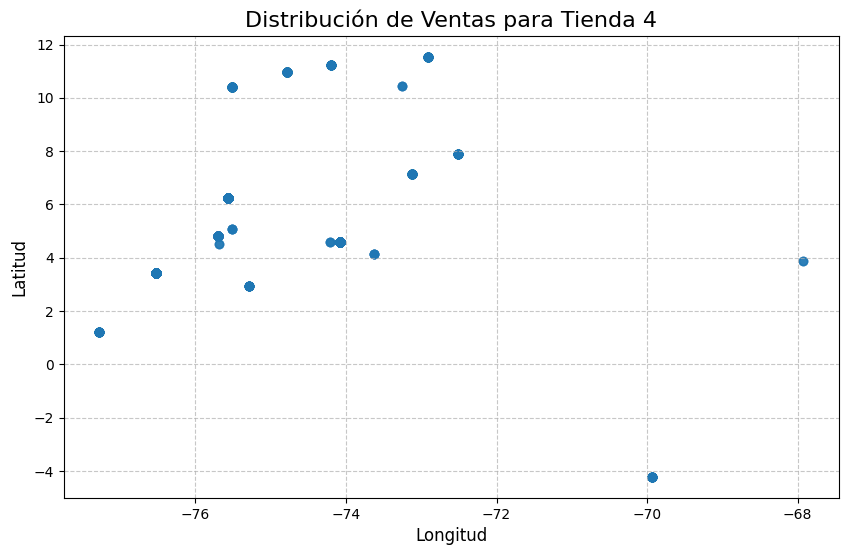

In [32]:
import matplotlib.pyplot as plt

unique_stores = all_stores_df['Tienda'].unique()

for store in unique_stores:
    store_data = all_stores_df[all_stores_df['Tienda'] == store]
    plt.figure(figsize=(10, 6))
    plt.scatter(store_data['lon'], store_data['lat'], alpha=0.6)
    plt.title(f'Distribución de Ventas para {store}', fontsize=16)
    plt.xlabel('Longitud', fontsize=12)
    plt.ylabel('Latitud', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()